In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'DATA/moviereviews.csv')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [3]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [8]:
df = df[~df['review'].str.isspace()]

In [10]:
df[df['review'].apply(lambda review: review=='')]

,label,review


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [12]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

### EDA on Bag of Words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')

matrix = count_vect.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(count_vect.get_feature_names(), matrix.sum(axis=0).tolist()[0])
#sort from largest to smallest
print(sorted(freqs,key=lambda x: -x[-1]))[:20]

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634), ('people', 628), ('director', 627), ('films', 623), ('know', 617), ('scenes', 608), ('man', 607), ('big', 583), ('new', 553), ('movies', 544), ('better', 514), ('end', 511), ('life', 504), ('best', 497), ('work', 486), ('isn', 475), ('script', 467), ('audience', 455), ('going', 448), ('funny', 440), ('love', 437), ('think', 436), ('thing', 434), ('gets', 426), ('look', 417), ('makes', 415), ('comedy', 413), ('actually', 412), ('real', 410), ('did', 408), ('long', 405), ('old', 390), ('year', 385), ('things', 384), ('ve', 382), ('great', 379), ('fact', 377), ('role', 377), ('played', 376), ('say', 375), ('minutes', 370), ('acting', 362), ('guy', 362), ('plays', 361), 

TypeError: 'NoneType' object is not subscriptable

### TRAINING DATA

In [18]:
X = df['review']
y = df['label']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=101)

### CREATING A PIPELINE

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [23]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', LinearSVC()),
])

In [24]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

### CLASSIFICATION REPORT

In [25]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [26]:
pred = pipe.predict(X_test)

In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



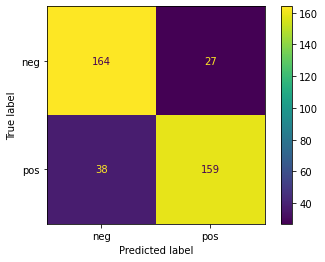

In [29]:
plot_confusion_matrix(pipe,X_test,y_test)